In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Mamografias.csv')

# LIMPIEZA DE DATOS

In [2]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [3]:
print('el set de datos contiene', df.shape[0], 'Filas y', df.shape[1], 'Columnas')

el set de datos contiene 830 Filas y 6 Columnas


In [4]:
df.isnull().describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830,830,830,830,830,830
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,830,830,830,830,830,830


In [5]:
print(df.isnull().sum())  # Suma de los valores nulos de cada columna

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64


In [6]:
df.describe() # Resumen rapido del set de datos

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.333735,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.688134,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [7]:
nombres_columnas = df.columns.tolist() # Cuales son los valores que se repiten y su proporcion normalizada

for i in nombres_columnas:
    print(df[i].value_counts(), df[i].value_counts(normalize=True))
    print('---------------------------------------')
    #print(df[i].value_counts(normalize=True))

BI-RADS
4    468
5    317
3     24
6      9
2      7
0      5
Name: count, dtype: int64 BI-RADS
4    0.563855
5    0.381928
3    0.028916
6    0.010843
2    0.008434
0    0.006024
Name: proportion, dtype: float64
---------------------------------------
Age
67    30
59    29
66    28
57    27
46    25
      ..
88     1
93     1
26     1
18     1
20     1
Name: count, Length: 72, dtype: int64 Age
67    0.036145
59    0.034940
66    0.033735
57    0.032530
46    0.030120
        ...   
88    0.001205
93    0.001205
26    0.001205
18    0.001205
20    0.001205
Name: proportion, Length: 72, dtype: float64
---------------------------------------
Shape
4    379
1    190
2    180
3     81
Name: count, dtype: int64 Shape
4    0.456627
1    0.228916
2    0.216867
3    0.097590
Name: proportion, dtype: float64
---------------------------------------
Margin
1    320
4    254
5    127
3    106
2     23
Name: count, dtype: int64 Margin
1    0.385542
4    0.306024
5    0.153012
3    0.127711
2    0.0

C:\Users\ehevi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


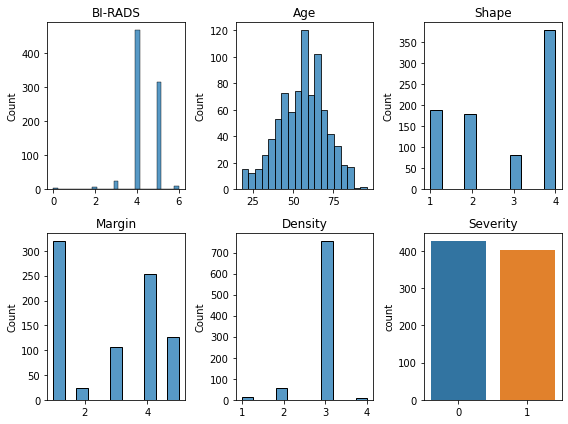

In [8]:
plt.figure(figsize = (8,6))
for i, n in enumerate(df):
    plt.subplot(2, 3, i+1)
    if len(df[n].value_counts()) > 2:
        sns.histplot(df[n])
        plt.title(n)
        plt.xlabel('')
    else:
        sns.countplot(df[n])
        plt.title(n)
        plt.xlabel('')
    plt.tight_layout()

Text(0.5, 1.0, 'mapa de calor de correlaciones')

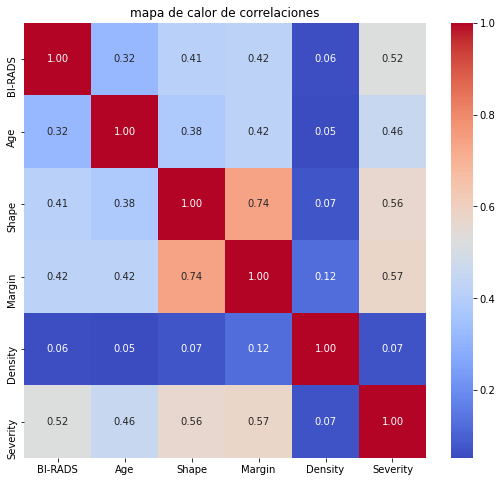

In [9]:
mc = df.corr()

plt.figure(figsize=(9,8))
heatmap = sns.heatmap(mc, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('mapa de calor de correlaciones')

# SEPARACIÓN DE DATOS Y ESCALADO

In [10]:
datos = df.columns[0:-1]
objetivo = df.columns[-1]

X = df[datos]
y = df[objetivo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# APLICAR METODO DE REGRESION LOGISTICA

Accuracy Regresion Logistica: 0.8433734939759037

--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------

Mejores parámetros: {'C': 1.0, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor score (val): 0.8328313253012049

Train Score: 0.8313253012048193
Test Score:  0.8433734939759037



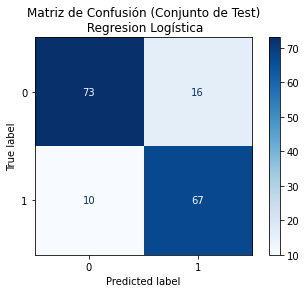

Matriz de Confusión:
[[73 16]
 [10 67]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        89
           1       0.81      0.87      0.84        77

    accuracy                           0.84       166
   macro avg       0.84      0.85      0.84       166
weighted avg       0.85      0.84      0.84       166



In [42]:
modelo_LR = LogisticRegression().fit(X_train_scaled, y_train)
np.set_printoptions(suppress = True)
#print(modelo.predict(X_test))
#print(modelo.predict_proba(X_test))

print(f"Accuracy Regresion Logistica: {modelo_LR.score(X_test_scaled, y_test)}")
#print(len(modelo.predict(X_test)))
#print(modelo.intercept_, modelo.coef_)

print('\n--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------\n')

# Definir modelo y parámetros VÁLIDOS
model_LR_params = LogisticRegression()

params_grid_LR = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 300],  # Aumentar iteraciones
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1.0, 10],
        'solver': ['saga'],
        'l1_ratio': [0.2, 0.5, 0.8],  # para elasticnet
        'max_iter': [100, 200, 300],
        'class_weight': [None, 'balanced']
    }
]

#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
grid_search_LR = GridSearchCV(
    model_LR_params, 
    params_grid_LR, 
    cv = 4, 
    scoring = 'accuracy',
    n_jobs = -1,
    error_score = 'raise'  # Para debuggear errores
)
grid_search_LR.fit(X_train_scaled, y_train)

# Resultados
print(f'Mejores parámetros: {grid_search_LR.best_params_}')
print(f'Mejor score (val): {grid_search_LR.best_score_}\n')

mejor_modelo_LR = grid_search_LR.best_estimator_
print(f'Train Score: {mejor_modelo_LR.score(X_train_scaled, y_train)}')
print(f'Test Score:  {mejor_modelo_LR.score(X_test_scaled, y_test)}\n')

y_pred_LR = mejor_modelo_LR.predict(X_test_scaled)
cm_LR = confusion_matrix(y_test, y_pred_LR)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (Conjunto de Test)\n Regresion Logística")
plt.show()


print("Matriz de Confusión:")
print(cm_LR)
print("\nReporte de Clasificación:")
print(reporte_LR)

#############################################################################

# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# import numpy as np

# GRAFICO CURVA ROC/AUC
# y_score = mejor_modelo_LR.decision_function(X_test_scaled)
# fpr, tpr, _ = roc_curve(y_test, y_score)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (8, 6))
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()


# APLICAR ARBOL DE DECISIONES

Train Accuracy: 0.8539156626506024
Test Accuracy: 0.8132530120481928

--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------

Mejores parámetros: {'ccp_alpha': 0, 'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mejor score (val): 0.8523971053821799

Train Score: 0.8539156626506024
Test Score: 0.8192771084337349



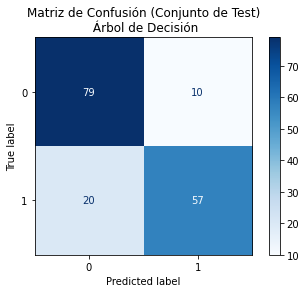

[[79 10]
 [20 57]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        89
           1       0.85      0.74      0.79        77

    accuracy                           0.82       166
   macro avg       0.82      0.81      0.82       166
weighted avg       0.82      0.82      0.82       166



In [43]:
model_tree = DecisionTreeClassifier(max_depth = 3, random_state = 42)

model_tree.fit(X_train, y_train)

print(f'Train Accuracy: {model_tree.score(X_train, y_train)}')
print(f'Test Accuracy: {model_tree.score(X_test, y_test)}\n')

print('--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------\n')

# Definir modelo y parámetros
modelo_arbol_params = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0, 0.01],
    'class_weight' : [None, 'balanced']
}

# Configurar GridSearchCV con validación cruzada 
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
grid_search_tree = GridSearchCV(
    modelo_arbol_params, 
    params, 
    cv=10, 
    scoring='accuracy', 
    n_jobs=-1           
)
grid_search_tree.fit(X_train, y_train)

# Resultados
print(f'Mejores parámetros: {grid_search_tree.best_params_}')
print(f'Mejor score (val): {grid_search_tree.best_score_}\n')

best_modelo_arbol = grid_search_tree.best_estimator_
print(f'Train Score: {best_modelo_arbol.score(X_train, y_train)}') # precision con datos de entrenamiento
print(f'Test Score: {best_modelo_arbol.score(X_test, y_test)}\n') # precision con datos de prueba

y_pred_tree = best_modelo_arbol.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (Conjunto de Test)\n Árbol de Decisión")
plt.show()

reporte_tree = classification_report(y_test, y_pred_tree)
print(cm_tree)
print(reporte_tree)

####################################################################################################################


# GRAFICO CURVA ROC/AUC
# y_score = best_modelo_arbol.predict_proba(X_test)[:, 1]

# fpr, tpr, _ = roc_curve(y_test, y_score)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(7, 5))
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
# plt.plot([0, 1], [0, 1], linestyle="--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve (Decision Tree)")
# plt.legend()
# plt.show()



# APLICANDO BOSQUE ALEATORIO

Train Accuracy: 0.9397590361445783
Test Accuracy: 0.8012048192771084

--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------

Mejores Parámetros: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 16}
Mejor Scoring: 0.8538444142921755

Train Score: 0.8614457831325302
Test Score: 0.8253012048192772



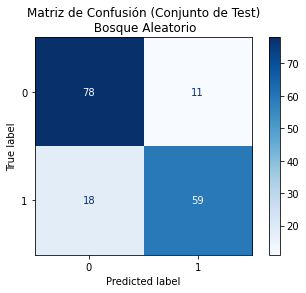

[[78 11]
 [18 59]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        89
           1       0.84      0.77      0.80        77

    accuracy                           0.83       166
   macro avg       0.83      0.82      0.82       166
weighted avg       0.83      0.83      0.82       166



In [44]:
model_RF = RandomForestClassifier(random_state = 100)

model_RF.fit(X_train, y_train)
print("Train Accuracy:", model_RF.score(X_train, y_train))
print("Test Accuracy:", model_RF.score(X_test, y_test))

print('\n--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------\n')

model_RF_params = RandomForestClassifier(random_state = 100)

params_RF = {
    #'n_estimators': [50, 100, 200],  # Número de árboles
    'n_estimators': [10, 12, 14, 16, 18, 20],
    'max_depth': [3, 5, None],       # Profundidad máxima
    'min_samples_leaf': [1, 5, 10],  # Mínimo en hojas
    'max_features': ['sqrt', 'log2']  # Features por división
}

#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

grid_search_RF = GridSearchCV(model_RF_params,
                             params_RF,
                             cv = 10,
                             scoring = 'accuracy',
                             n_jobs = -1)

grid_search_RF.fit(X_train, y_train)
print(f'Mejores Parámetros: {grid_search_RF.best_params_}')
print(f'Mejor Scoring: {grid_search_RF.best_score_}\n')

best_modelo_RF = grid_search_RF.best_estimator_
print(f'Train Score: {best_modelo_RF.score(X_train, y_train)}')
print(f'Test Score: {best_modelo_RF.score(X_test, y_test)}\n')

y_pred_RF = best_modelo_RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_pred_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (Conjunto de Test)\n Bosque Aleatorio")
plt.show()

reporte_RF = classification_report(y_test, y_pred_RF)
print(cm_RF)
print(reporte_RF)

####################################################################################################################

# GRAFICO CURVA ROC/AUC
# y_score_RF = best_modelo_RF.predict_proba(X_test)[:, 1]

# fpr_RF, tpr_RF, _ = roc_curve(y_test, y_score_RF)
# roc_auc_RF = auc(fpr_RF, tpr_RF)

# plt.figure(figsize=(7, 5))
# plt.plot(fpr_RF, tpr_RF, label=f"AUC = {roc_auc_RF:.3f}")
# plt.plot([0, 1], [0, 1], linestyle="--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve (Random Forest)")
# plt.legend()
# plt.show()


# Aplicando SVM

Train Accuracy: 0.8524096385542169
Test Accuracy: 0.8313253012048193

--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------

Mejores Parámetros: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor Accuracy: 0.8403622693096378

Train Score: 0.8554216867469879
Test Score: 0.8313253012048193



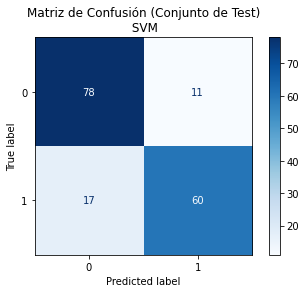

[[78 11]
 [17 60]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        89
           1       0.85      0.78      0.81        77

    accuracy                           0.83       166
   macro avg       0.83      0.83      0.83       166
weighted avg       0.83      0.83      0.83       166



In [45]:
from sklearn.svm import SVC

model_svm = SVC(random_state = 42)

model_svm.fit(X_train_scaled, y_train)
print(f'Train Accuracy: {model_svm.score(X_train_scaled, y_train)}')
print(f'Test Accuracy: {model_svm.score(X_test_scaled, y_test)}')

print('\n--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------\n')

model_svm_params = SVC(random_state = 42)

params_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01]    
}

#cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
grid_search_svm = GridSearchCV(model_svm_params,
                              params_svm,
                              cv = 5,
                              scoring = 'accuracy', 
                              n_jobs = -1)

grid_search_svm.fit(X_train_scaled, y_train)
print(f'Mejores Parámetros: {grid_search_svm.best_params_}')
print(f'Mejor Accuracy: {grid_search_svm.best_score_}\n')

best_modelo_svm = grid_search_svm.best_estimator_
print(f'Train Score: {best_modelo_svm.score(X_train_scaled, y_train)}')
print(f'Test Score: {best_modelo_svm.score(X_test_scaled, y_test)}\n')

y_pred_svm = best_modelo_svm.predict(X_test_scaled)
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (Conjunto de Test)\n SVM")
plt.show()

report_svm = classification_report(y_test, y_pred_svm)
print(cm_svm)
print(report_svm)

######################################################################################################################

# GRAFICO CURVA ROC/AUC
# y_score_svm = best_modelo_svm.decision_function(X_test_scaled)

# fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
# roc_auc_svm = auc(fpr_svm, tpr_svm)

# plt.figure(figsize=(7, 5))
# plt.plot(fpr_svm, tpr_svm, label=f"AUC = {roc_auc_svm:.3f}")
# plt.plot([0, 1], [0, 1], linestyle="--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve (SVM)")
# plt.legend()
# plt.show()



# Aplicando XGBoost

Train Score: 0.9262048192771084
Test Score: 0.8012048192771084

--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------

Mejores Parametros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}

Train Accuracy: 0.8765060240963856
Test Accuracy: 0.8132530120481928



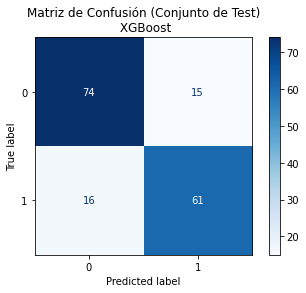

[[74 15]
 [16 61]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        89
           1       0.80      0.79      0.80        77

    accuracy                           0.81       166
   macro avg       0.81      0.81      0.81       166
weighted avg       0.81      0.81      0.81       166



In [46]:
from xgboost import XGBClassifier

modelo_xgb = XGBClassifier(random_state = 42)
modelo_xgb.fit(X_train, y_train)
print(f'Train Score: {modelo_xgb.score(X_train, y_train)}')
print(f'Test Score: {modelo_xgb.score(X_test, y_test)}')

print('\n--------- ENCONTRANDO LOS MEJORES HIPERPARÁMETROS -------------\n')

modelo_xgb_params = XGBClassifier(random_state = 42)
params_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
    
#      'n_estimators': [10, 50, 100],
#      'max_depth': [1, 3, 4],
#      'learning_rate': [0.05, 0.1, 0.2]
    

}

#cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)

grid_search_xgb = GridSearchCV(modelo_xgb_params,
                              params_xgb,
                              cv = 5,
                              scoring = 'recall',
                              n_jobs = -1,
                              error_score = 0)

grid_search_xgb.fit(X_train, y_train)
print(f'Mejores Parametros: {grid_search_xgb.best_params_}\n')
#print(f'Mejor Accuracy: {grid_search_xgb.best_score_}')

best_model_xgb = grid_search_xgb.best_estimator_
print(f'Train Accuracy: {best_model_xgb.score(X_train, y_train)}')
print(f'Test Accuracy: {best_model_xgb.score(X_test, y_test)}\n')

y_pred_xgb = best_model_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (Conjunto de Test)\n XGBoost")
plt.show()

reporte_xgb = classification_report(y_test, y_pred_xgb)

print(cm_xgb)
print(reporte_xgb)



Epoch 1/30 | Train Loss: 0.7416 | Train Acc: 0.4940 | Test Loss: 0.7388 | Test Acc: 0.4639
Epoch 2/30 | Train Loss: 0.7158 | Train Acc: 0.4940 | Test Loss: 0.7097 | Test Acc: 0.4819
Epoch 3/30 | Train Loss: 0.6917 | Train Acc: 0.5105 | Test Loss: 0.6836 | Test Acc: 0.5482
Epoch 4/30 | Train Loss: 0.6694 | Train Acc: 0.5904 | Test Loss: 0.6588 | Test Acc: 0.6867
Epoch 5/30 | Train Loss: 0.6484 | Train Acc: 0.7545 | Test Loss: 0.6339 | Test Acc: 0.7711
Epoch 6/30 | Train Loss: 0.6258 | Train Acc: 0.7952 | Test Loss: 0.6112 | Test Acc: 0.7711
Epoch 7/30 | Train Loss: 0.6063 | Train Acc: 0.8072 | Test Loss: 0.5883 | Test Acc: 0.8012
Epoch 8/30 | Train Loss: 0.5865 | Train Acc: 0.8027 | Test Loss: 0.5679 | Test Acc: 0.8193
Epoch 9/30 | Train Loss: 0.5675 | Train Acc: 0.8042 | Test Loss: 0.5482 | Test Acc: 0.8253
Epoch 10/30 | Train Loss: 0.5490 | Train Acc: 0.8238 | Test Loss: 0.5309 | Test Acc: 0.8373
Epoch 11/30 | Train Loss: 0.5327 | Train Acc: 0.8193 | Test Loss: 0.5132 | Test Acc: 0.84

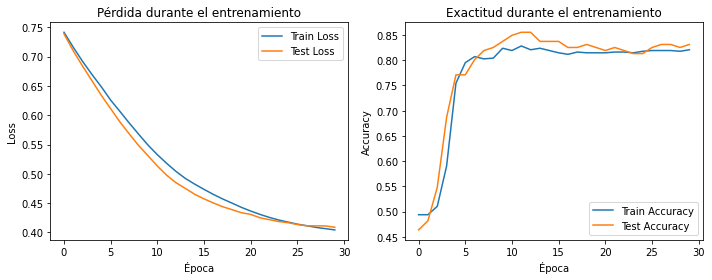

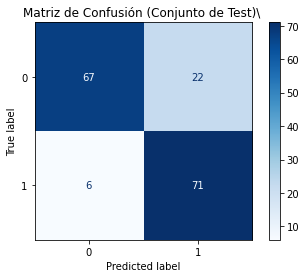


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        89
           1       0.76      0.92      0.84        77

    accuracy                           0.83       166
   macro avg       0.84      0.84      0.83       166
weighted avg       0.85      0.83      0.83       166



In [49]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

x_train_tensor = torch.from_numpy(X_train_scaled).float()
x_test_tensor = torch.from_numpy(X_test_scaled).float()
y_train_tensor = torch.from_numpy(y_train.values)
y_test_tensor = torch.from_numpy(y_test.values)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 64
train_DL = DataLoader(train_dataset, batch_size, shuffle=True)
test_DL = DataLoader(test_dataset, batch_size, shuffle=False)





# Definir estructura de la red neuronal

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.red = nn.Sequential(
            nn.Linear(input_size, hidden_size1), nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2), nn.ReLU(),
            nn.Linear(hidden_size2, output_size)
        )
    
    def forward(self, x):
        return self.red(x)
    
# Instanciar la red, el numero de capas, neuronas, optimizador y funcion de costo

input_size = X_train_scaled.shape[1]
hidden_size1 = 10
hidden_size2 = 12
output_size = 2
learning_rate = 0.001

modelo = Model(input_size, hidden_size, output_size)
optimizer = torch.optim.Adam(modelo.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

# Entrenamiento y evaluación de la red neuronal


numero_epocas = 30

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

for epoch in range(numero_epocas):
    # ENTRENAMIENTO
    
    modelo.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    
    for x_batch, y_batch in train_DL:
        x_batch = x_batch.float()
        y_batch = y_batch.long().squeeze()

        pred = modelo(x_batch)
        loss = loss_function(pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss = total_loss + loss.item() * y_batch.size(0)
        total_correct = total_correct + (torch.argmax(pred, dim=1) == y_batch).sum().item()
        total_samples = total_samples + y_batch.size(0)
    
    epoch_train_loss = total_loss / total_samples
    epoch_train_acc = total_correct / total_samples
    
    
    
    # EVALUACION DEL MODELO
    
    modelo.eval()
    total_loss, total_correct, total_samples = 0, 0, 0
    with torch.no_grad():
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.float()
            y_batch = y_batch.long().squeeze()
            
            pred = modelo(x_batch)
            loss = loss_function(pred, y_batch)
            
            total_loss = total_loss + loss.item() * y_batch.size(0)
            total_correct = total_correct + (torch.argmax(pred, dim=1) == y_batch).sum().item()
            total_samples = total_samples + y_batch.size(0)
    
    epoch_test_loss = total_loss / total_samples
    epoch_test_acc = total_correct / total_samples
    
    # GUARDANDO DATOS DE LAS METRICA
    train_loss_list.append(epoch_train_loss)
    train_acc_list.append(epoch_train_acc)
    test_loss_list.append(epoch_test_loss)
    test_acc_list.append(epoch_test_acc)
    
    print(f"Epoch {epoch+1}/{numero_epocas} | "
          f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f} | "
          f"Test Loss: {epoch_test_loss:.4f} | Test Acc: {epoch_test_acc:.4f}")

# GRAFICO DE DESEMPEÑO DEL MODELO

plt.figure(figsize=(10,4))

# GRAFICO DE PERDIDA-
plt.subplot(1,2,1)
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

# GRAFICO DE ACCURACY
plt.subplot(1,2,2)
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Exactitud durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# MATRIZ DE CONFUSION

modelo.eval()
y_pred_list, y_true_list = [], []
with torch.no_grad():
    for x_batch, y_batch in test_DL:
        x_batch = x_batch.float()
        outputs = modelo(x_batch)
        preds = torch.argmax(outputs, dim=1)
        y_pred_list.extend(preds.numpy())
        y_true_list.extend(y_batch.numpy())

cm = confusion_matrix(y_true_list, y_pred_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (Conjunto de Test)\ ")
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_true_list, y_pred_list))
